In [4]:
#KÜTÜPHANELERİ İMPORT ETME#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Dataframe Oluşturma işlemi#
data=pd.read_csv("credit_risk.csv")
df=pd.DataFrame(data)
print(df.isnull().sum())

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


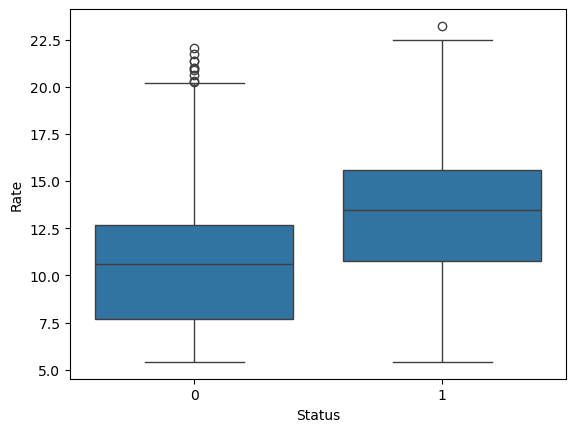

In [6]:
sns.boxplot(x="Status",y="Rate",data=df)
plt.show()

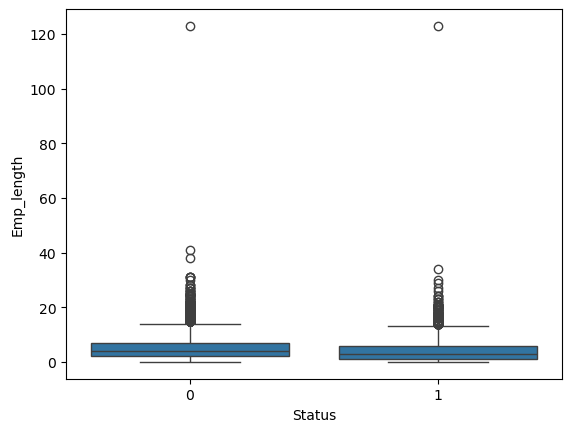

In [7]:
sns.boxplot(x="Status",y="Emp_length",data=df)
plt.show()

In [9]:

#IQR işleminin "Emp_length" sütununa uygulanması
Q1=df["Emp_length"].quantile(0.15)
Q3=df["Emp_length"].quantile(0.85)

IQR_emp_length=Q3-Q1

alt_limit_EmpLength=Q1-(0.1*IQR_emp_length)
print(f"alt limit:{alt_limit_EmpLength}")
ust_limit_EmpLength=Q3+(1.5*IQR_emp_length)
print(f"ust limit:{ust_limit_EmpLength}")

df_new=df[((df["Emp_length"]>=alt_limit_EmpLength) & (df["Emp_length"]<=ust_limit_EmpLength))]




alt limit:0.19999999999999996
ust limit:21.0


In [10]:

remaining_outliers1 = df_new[(df_new["Emp_length"] < alt_limit_EmpLength) | (df_new["Emp_length"] > ust_limit_EmpLength)]
print(f"Kalan aykırı değerler:\n{remaining_outliers1}")
print(df_new)


Kalan aykırı değerler:
Empty DataFrame
Columns: [Id, Age, Income, Home, Emp_length, Intent, Amount, Rate, Status, Percent_income, Default, Cred_length]
Index: []
          Id  Age  Income      Home  Emp_length           Intent  Amount  \
1          1   21    9600       OWN         5.0        EDUCATION    1000   
2          2   25    9600  MORTGAGE         1.0          MEDICAL    5500   
3          3   23   65500      RENT         4.0          MEDICAL   35000   
4          4   24   54400      RENT         8.0          MEDICAL   35000   
5          5   21    9900       OWN         2.0          VENTURE    2500   
...      ...  ...     ...       ...         ...              ...     ...   
32576  32576   57   53000  MORTGAGE         1.0         PERSONAL    5800   
32577  32577   54  120000  MORTGAGE         4.0         PERSONAL   17625   
32578  32578   65   76000      RENT         3.0  HOMEIMPROVEMENT   35000   
32579  32579   56  150000  MORTGAGE         5.0         PERSONAL   15000   
32

In [11]:
#Aykırı degerler kaldırıktan sonra oluşan duzensiz index numaralarını düznleme
df_new.reset_index(drop=True,inplace=True)
print(df_new)

          Id  Age  Income      Home  Emp_length           Intent  Amount  \
0          1   21    9600       OWN         5.0        EDUCATION    1000   
1          2   25    9600  MORTGAGE         1.0          MEDICAL    5500   
2          3   23   65500      RENT         4.0          MEDICAL   35000   
3          4   24   54400      RENT         8.0          MEDICAL   35000   
4          5   21    9900       OWN         2.0          VENTURE    2500   
...      ...  ...     ...       ...         ...              ...     ...   
27503  32576   57   53000  MORTGAGE         1.0         PERSONAL    5800   
27504  32577   54  120000  MORTGAGE         4.0         PERSONAL   17625   
27505  32578   65   76000      RENT         3.0  HOMEIMPROVEMENT   35000   
27506  32579   56  150000  MORTGAGE         5.0         PERSONAL   15000   
27507  32780   66   42000      RENT         2.0          MEDICAL    6475   

        Rate  Status  Percent_income Default  Cred_length  
0      11.14       0       

In [12]:
#yeni dataframe'de boş deger kontrolu
print(df_new.isnull().sum())


Id                   0
Age                  0
Income               0
Home                 0
Emp_length           0
Intent               0
Amount               0
Rate              2645
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


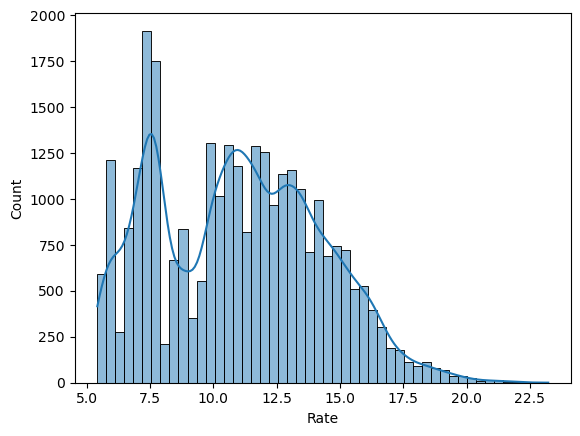

In [13]:
#datasette yer alan "Rate" sütununun eksik verilerini ortalamaya göre mi yoksa mode degerine göre mi verileciğinin analizi
sns.histplot(df["Rate"],kde=True)
plt.show()
#bu grafikten yorumlama yaparsak verilerimiz şu anda surekli ve çan eğrisi şeklinde bir görüntğ sergiliyor.Bu yüzden burada eksik verilerimizi
#ortalama ile doldurabiliriz.

In [16]:
#"Rate" sütunundak eksik verileri ortalama ile doldurma
df_new["Rate"]=df_new["Rate"].fillna(df_new["Rate"].mean())
print(df_new.isnull().sum())


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


C:\Users\Tuncer\AppData\Local\Temp\ipykernel_40208\2061626231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Rate"]=df_new["Rate"].fillna(df_new["Rate"].mean())


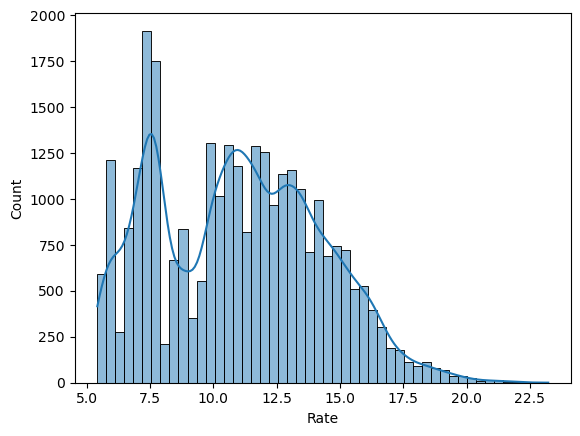

In [17]:
#datasette yer alan "Rate" sütununun eksik verilerini ortalamaya göre doldurulmuş halinin grafiği
sns.histplot(df["Rate"],kde=True)
plt.show()


In [18]:
#IQR işleminin "Amount" sütununa uygulanması
Q2=df["Amount"].quantile(0.31)
Q4=df["Amount"].quantile(0.69)

IQR_Amount=Q4-Q2

alt_limit_Amount=Q2-(0.1*IQR_Amount)
print(f"alt limit:{alt_limit_Amount}")
ust_limit_Amount=Q4+(2.4*IQR_Amount)
print(f"ust limit:{ust_limit_Amount}")

df_new=df[((df["Amount"]>=alt_limit_Amount) & (df["Amount"]<=ust_limit_Amount))]

print(df_new)


alt limit:5010.0
ust limit:25660.0
          Id  Age  Income      Home  Emp_length             Intent  Amount  \
2          2   25    9600  MORTGAGE         1.0            MEDICAL    5500   
33        33   25  306000      RENT         2.0  DEBTCONSOLIDATION   24250   
34        34   26  300000  MORTGAGE        10.0            MEDICAL    7800   
42        42   26  300000  MORTGAGE        10.0            VENTURE   20000   
43        43   23  300000       OWN         1.0          EDUCATION   24250   
...      ...  ...     ...       ...         ...                ...     ...   
32574  32574   52   65004      RENT         4.0           PERSONAL   20000   
32576  32576   57   53000  MORTGAGE         1.0           PERSONAL    5800   
32577  32577   54  120000  MORTGAGE         4.0           PERSONAL   17625   
32579  32579   56  150000  MORTGAGE         5.0           PERSONAL   15000   
32580  32780   66   42000      RENT         2.0            MEDICAL    6475   

        Rate  Status  Percen

<Axes: xlabel='Home', ylabel='Status'>

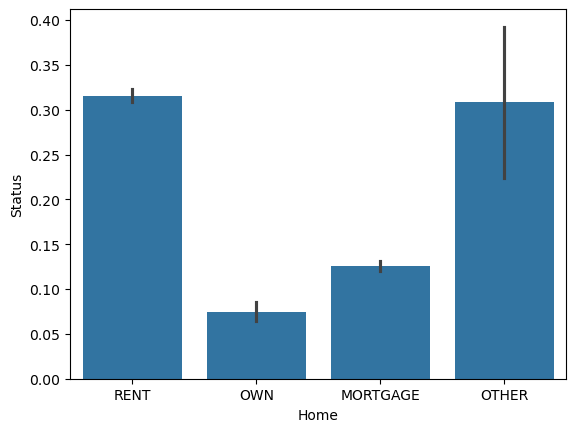

In [20]:
import seaborn as sns
sns.barplot(x='Home', y='Status', data=df)

In [ ]:
#Normalizasyon işlemleri:Burada max-min Normalizasyon yöntemi kullanılmışır.
#Verileri Normalize etmemizin amacı verilerin ölçeklerinin aynı olmasını sağlamaktır.
Normalizasyon_Columns=["Age",'Income', 'Amount', 'Rate', 'Emp_length',"Cred_length"]
scaler=MinMaxScaler()
df_new[Normalizasyon_Columns]=scaler.fit_transform(df_new[Normalizasyon_Columns])


          Id       Age    Income      Home  Emp_length             Intent  \
2          2  0.040323  0.000787  MORTGAGE    0.008130            MEDICAL   
33        33  0.040323  0.146669      RENT    0.016260  DEBTCONSOLIDATION   
34        34  0.048387  0.143716  MORTGAGE    0.081301            MEDICAL   
42        42  0.048387  0.143716  MORTGAGE    0.081301            VENTURE   
43        43  0.024194  0.143716       OWN    0.008130          EDUCATION   
...      ...       ...       ...       ...         ...                ...   
32574  32574  0.258065  0.028056      RENT    0.032520           PERSONAL   
32576  32576  0.298387  0.022148  MORTGAGE    0.008130           PERSONAL   
32577  32577  0.274194  0.055124  MORTGAGE    0.032520           PERSONAL   
32579  32579  0.290323  0.069889  MORTGAGE    0.040650           PERSONAL   
32580  32780  0.370968  0.016734      RENT    0.016260            MEDICAL   

         Amount      Rate  Status  Percent_income Default  Cred_length  
2 

C:\Users\Tuncer\AppData\Local\Temp\ipykernel_27408\3353240567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[Normalizasyon_Columns]=scaler.fit_transform(df_new[Normalizasyon_Columns])


In [ ]:
#Yeni oluşturulan df_new dataframe'ndeki düzensiz index degerleri tekrar duzenlenmistir.
df_new.reset_index(drop=True,inplace=True)
print(df_new)

          Id       Age    Income      Home  Emp_length             Intent  \
0          2  0.040323  0.000787  MORTGAGE    0.008130            MEDICAL   
1         33  0.040323  0.146669      RENT    0.016260  DEBTCONSOLIDATION   
2         34  0.048387  0.143716  MORTGAGE    0.081301            MEDICAL   
3         42  0.048387  0.143716  MORTGAGE    0.081301            VENTURE   
4         43  0.024194  0.143716       OWN    0.008130          EDUCATION   
...      ...       ...       ...       ...         ...                ...   
22648  32574  0.258065  0.028056      RENT    0.032520           PERSONAL   
22649  32576  0.298387  0.022148  MORTGAGE    0.008130           PERSONAL   
22650  32577  0.274194  0.055124  MORTGAGE    0.032520           PERSONAL   
22651  32579  0.290323  0.069889  MORTGAGE    0.040650           PERSONAL   
22652  32780  0.370968  0.016734      RENT    0.016260            MEDICAL   

         Amount      Rate  Status  Percent_income Default  Cred_length  
0 

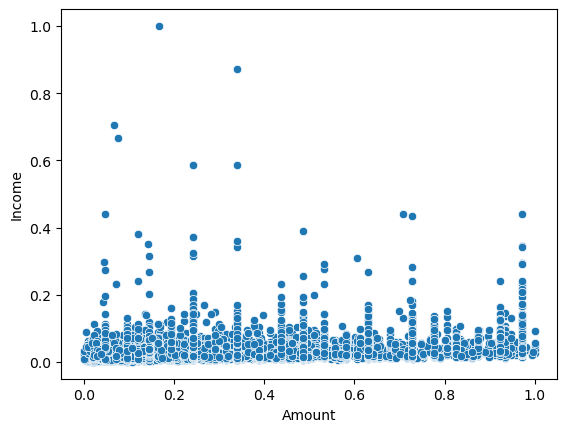

In [ ]:
#Normalize edilmiş olan verilere göre "Amount" ve "Income" sütunlarına göre bir scatterplot görseli
sns.scatterplot(x="Amount",y="Income",data=df_new)
plt.show()

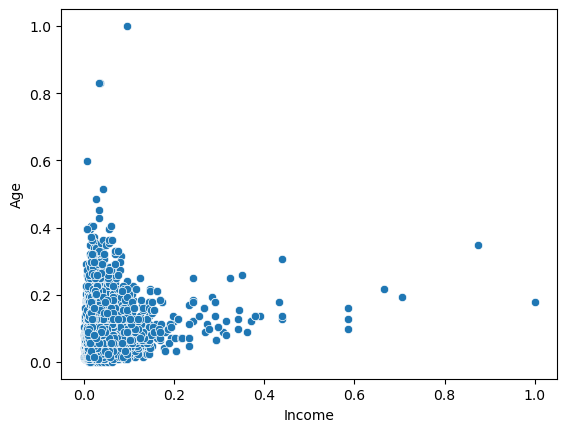

In [ ]:
#Normalize edilmiş olan verilere göre "Income" ve "Age" sütunlarına göre bir scatterplot görseli
sns.scatterplot(x="Income",y="Age",data=df_new)
plt.show()

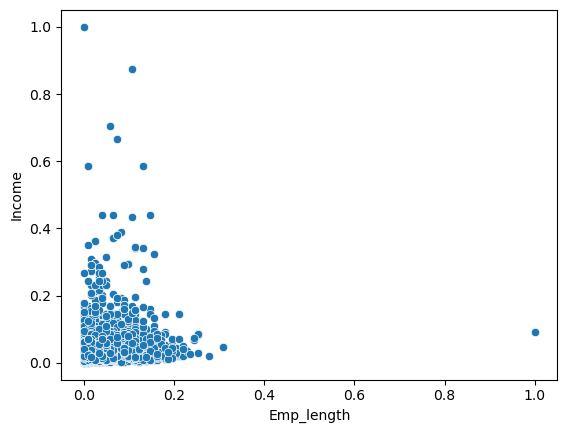

In [ ]:
#Normalize edilmiş olan verilere göre "Emp_length" ve "Income" sütunlarına göre bir scatterplot görseli
sns.scatterplot(x="Emp_length",y="Income",data=df_new)
plt.show()